<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [4]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [5]:
os.listdir()

['.config',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_order_payments_dataset.csv',
 'match_result_test.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'cookie_cats.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'app_wau.csv',
 'bz_data_analyis.csv',
 'sales.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'groceries.csv',
 'mock_sales_data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ab_experiment.csv',
 'ecommerce-data.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 'online_retail_II.xlsx',
 'lead_conversion.csv',
 '1_orders_dataset.csv',
 'sample_data']

In [6]:
df = pd.read_csv('cookie_cats.csv')

In [7]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [11]:
cnt = pd.melt(df, id_vars = ['userid','version','sum_gamerounds'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index(name = 'cnt')
cnt = cnt[cnt['result'] == True]
cnt

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


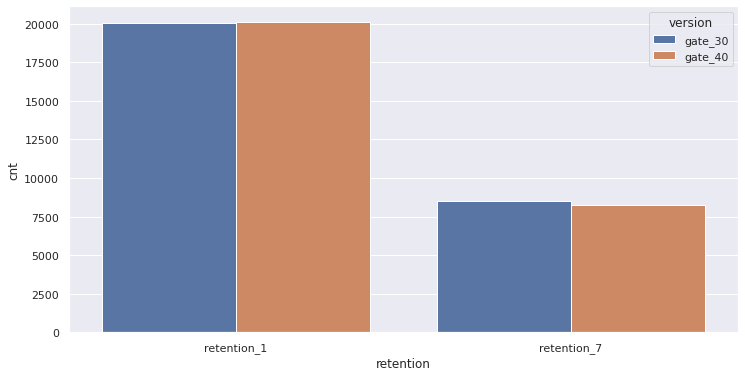

In [12]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.barplot(data = cnt, x = 'retention', y = 'cnt', hue = 'version')
plt.show()

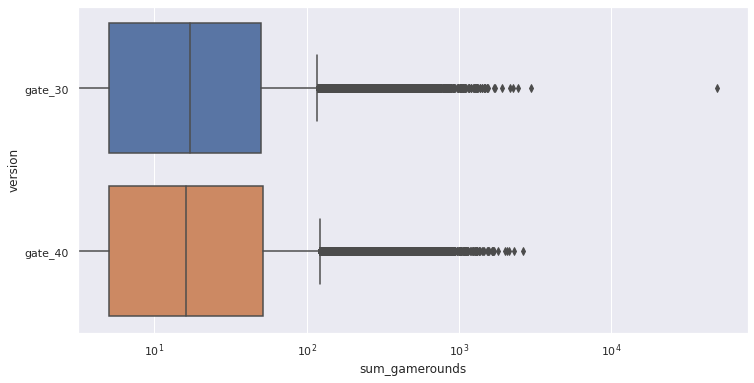

In [13]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [14]:
df = df[df['sum_gamerounds'] <= 10000]

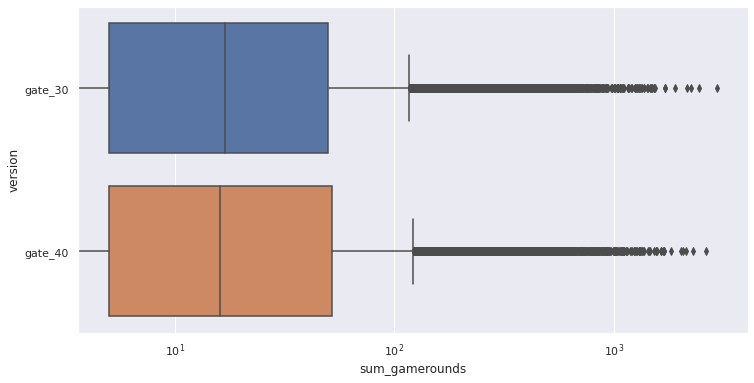

In [15]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

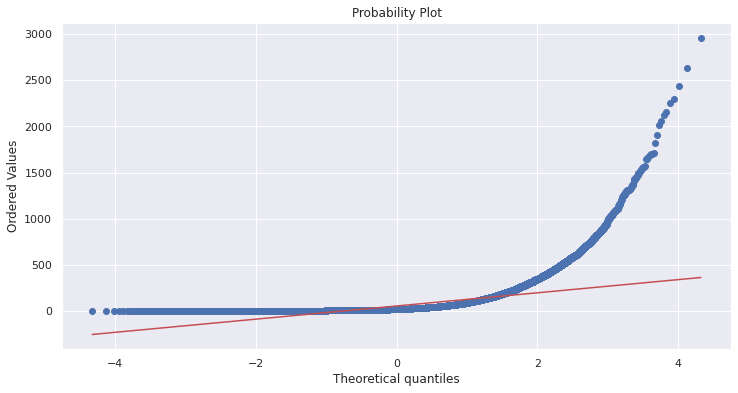

In [16]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [18]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat), '\t', str(p))

18528909.99029161 	 0.0


In [20]:
res = stats.anderson(df['sum_gamerounds'])
res

AndersonResult(statistic=13369.548966017013, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [21]:
res2 = zip(res.critical_values, res.significance_level)

In [22]:
[f'probably gaussian : critical value is {crit}, significance level is {sig}'
 if crit > sig 
 else f'probably not gaussian : critical value is {crit}, significance level is {sig}'
 for crit, sig in res2
]

['probably not gaussian : critical value is 0.576, significance level is 15.0',
 'probably not gaussian : critical value is 0.656, significance level is 10.0',
 'probably not gaussian : critical value is 0.787, significance level is 5.0',
 'probably not gaussian : critical value is 0.918, significance level is 2.5',
 'probably gaussian : critical value is 1.092, significance level is 1.0']

In [24]:
n = 1000
boots = pd.DataFrame(
    df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,49.530621,53.625816
sum_gamerounds,50.670049,51.442140
sum_gamerounds,53.700289,51.462677
sum_gamerounds,51.090126,49.919190
sum_gamerounds,53.349955,50.255723


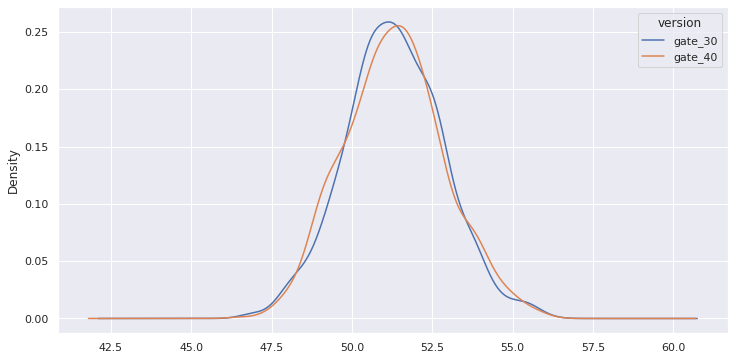

In [25]:
boots.plot.kde()

In [26]:
diff=  boots['gate_30'] - boots['gate_40']
len(diff[diff>0])/n

0.502

In [27]:
z_mean = np.mean(boots['gate_30']) - np.mean(boots['gate_40'])
z_sigma = np.sqrt(
    np.var(boots['gate_30'])/n + np.var(boots['gate_40'])/n
)
alpha = .05
ci_diff = [z_mean - norm.ppf(1 - alpha/2) * z_sigma, z_mean + norm.ppf(1 - alpha/2) * z_sigma]

In [28]:
print(f'Z Mean : {z_mean}')
print(f'Z Sgima : {z_sigma}')
print(f'CI Diff : {ci_diff[0]}, {ci_diff[1]}')

Z Mean : 0.002434833962148275
Z Sgima : 0.06884246615101902
CI Diff : -0.13249392030076676, 0.1373635882250633


Text(0.5, 0, 'difference of bootstrapped gamerounds')

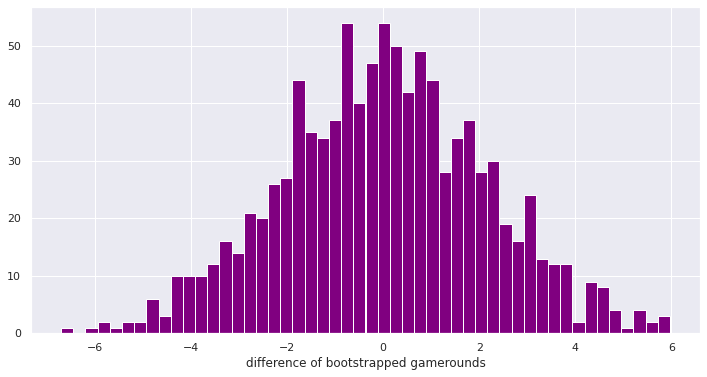

In [29]:
plt.hist(diff, bins = 50, color = 'purple')
plt.xlabel('difference of bootstrapped gamerounds')

# Iterators

In [30]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [31]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}